時間発展演算子から計算した量子ウォークの各バンドの時間経過をプロットするソースコード  
時間発展演算子 $U(t) = e^{i t \frac{A}{2}}$  (あるいは $U(t) = e^{i t \frac{A}{2}}$) 、$A$ を隣接行列として計算した場合を記述している  
波動関数 $\psi(t)$ を (x1)×1の行列とする。これは、1次元軸上に粒子が x1 個並んでいる状態を表している。
また、$$\psi(t) = U(t) \psi(0)$$ $$(\psi(0) = initialstate)$$ である。
プロットした結果がベッセル関数と一致していることを確認する。

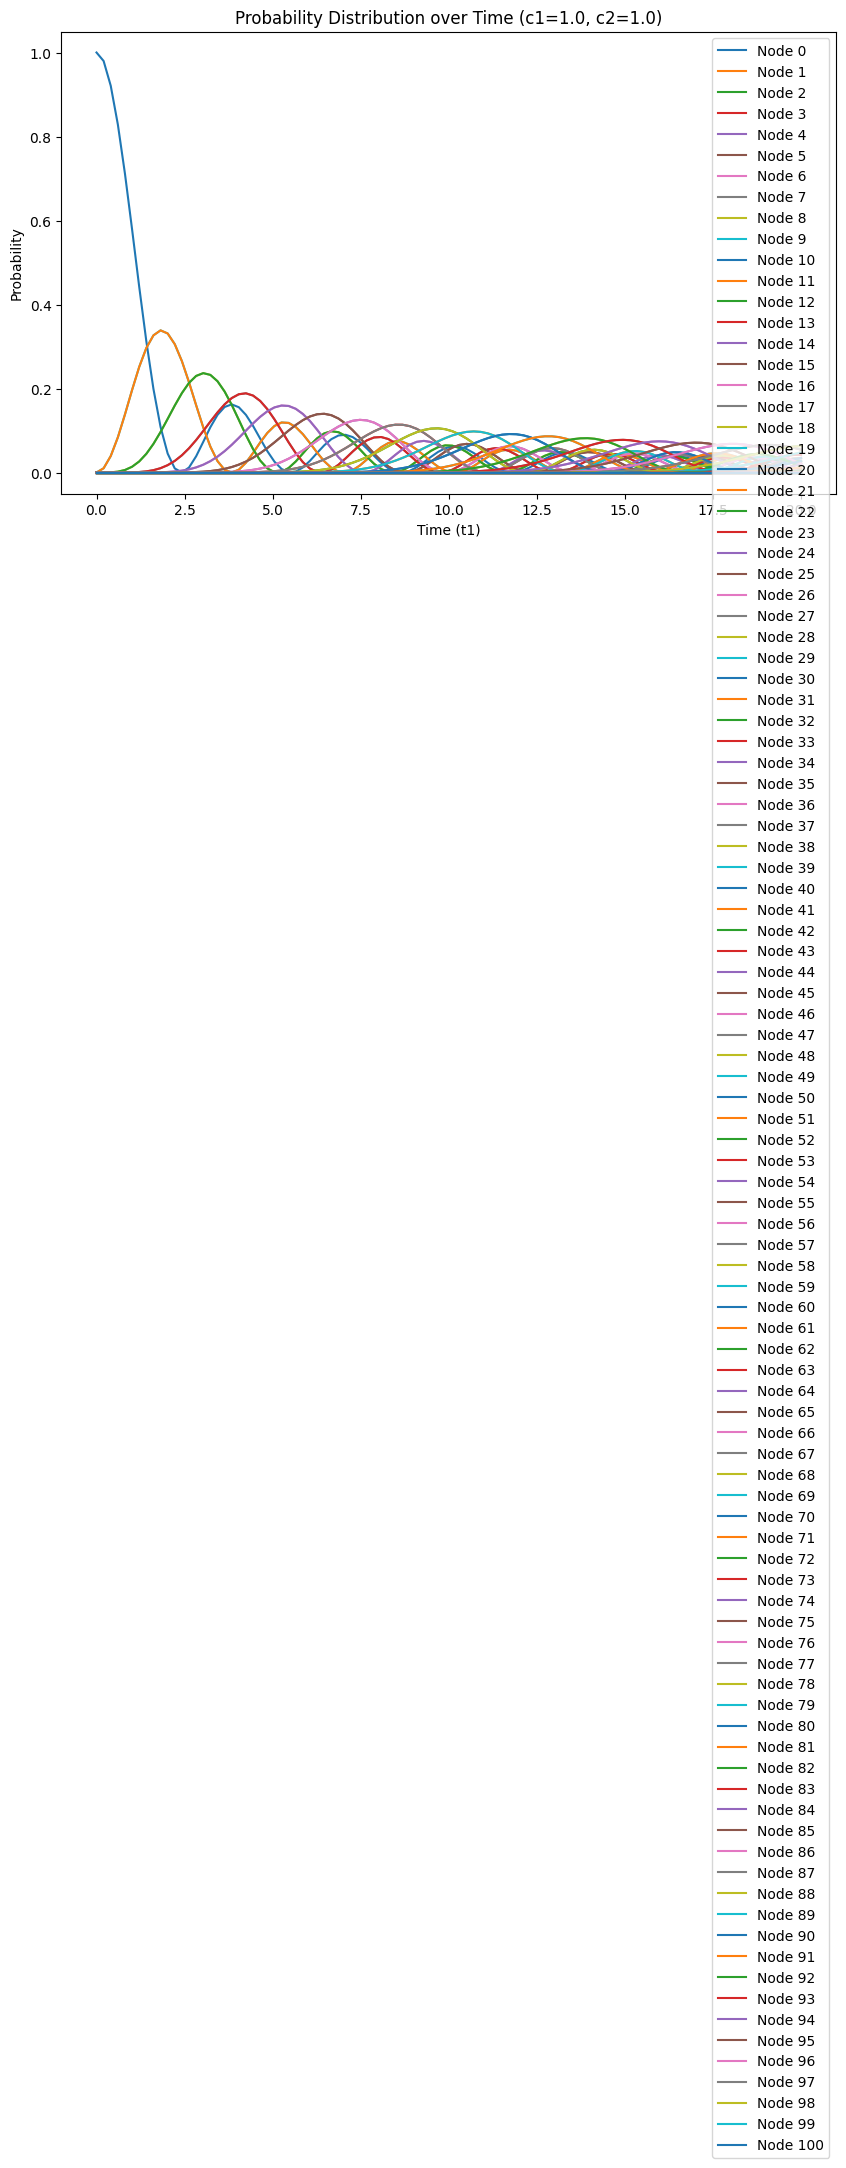

In [10]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# グラフのサイズ
x1 = 101

# 初期状態ベクトルを定義
initial_state = np.zeros((x1, 1))
initial_state[50] = 1

def quantum_walk(c1, c2, t1_max):
    # t1 の範囲を定義
    t1_values = np.linspace(0, t1_max, 100)
    
    # 結果を保存するための配列
    probabilities_over_time = np.zeros((len(t1_values), x1))

    for i, t1 in enumerate(t1_values):
        # 隣接行列の作成
        A = np.zeros((x1, x1))
        for j in range(x1):
            A[j, (j + 1) % x1] = c1
            A[j, (j - 1) % x1] = c1
            A[j, j % x1] = 1 - c1
            A[x1-1, 0] = 0
            A[0, x1-1] = 0

        # 時間発展演算子 U_t の計算
        U_t = expm(-1j * t1 * A / 2)

        # 時間発展後の状態を計算
        final_state = U_t @ initial_state

        # 確率分布を計算
        probabilities = np.abs(final_state)**2
        probabilities_over_time[i, :] = probabilities.flatten()

    # 確率分布をプロット
    plt.figure(figsize=(10, 6))
    for j in range(x1):
        plt.plot(t1_values, probabilities_over_time[:, j], label=f'Node {j}')
    plt.xlabel('Time (t1)')
    plt.ylabel('Probability')
    plt.title(f'Probability Distribution over Time (c1={c1}, c2={c2})')
    plt.legend()
    plt.show()

# パラメータ
c1 = 1.0  # 例: 1.0
c2 = 1.0  # 例: 1.0
t1_max = 20  # t1 の最大値

# 関数の実行
quantum_walk(c1, c2, t1_max)


隣接行列$A$のn乗($A^n$)の特定行が、パスカルの三角形になることを確認する

In [23]:
# ただの隣接行列の計算2

import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# グラフのサイズ
x1 = 11

n1 = 5
# 初期状態ベクトルを定義
initial_state = np.zeros((x1, 1))
initial_state[n1] = 1

n5 = int(input("Please Enter Number"))

def quantum_walk(c1, c2, t1_max, n5):
    # t1 の範囲を定義
    t1_values = np.linspace(0, t1_max, 100)
    
    # 結果を保存するための配列
    probabilities_over_time = np.zeros((len(t1_values), x1))

    for i, t1 in enumerate(t1_values):
        # 隣接行列の作成
        A = np.zeros((x1, x1))
        for j in range(x1):
            A[j, (j + 1) % x1] = c1
            A[j, (j - 1) % x1] = c1
            A[j, j % x1] = 1 - c1
            A[x1-1, 0] = c1
            A[0, x1-1] = c1

    A1 = A.copy()
    for p in range(n5-1):
        A2 = np.dot(A1,A)
        A1 = A2.copy()
        print("A^{} = {}".format(p+2,A2[n1]))


# パラメータ
c1 = 1.0  # 例: 1.0
c2 = 1.0  # 例: 1.0
t1_max = 20  # t1 の最大値

# 関数の実行
quantum_walk(c1, c2, t1_max,n5)


Please Enter Number 10


A^2 = [0. 0. 0. 1. 0. 2. 0. 1. 0. 0. 0.]
A^3 = [0. 0. 1. 0. 3. 0. 3. 0. 1. 0. 0.]
A^4 = [0. 1. 0. 4. 0. 6. 0. 4. 0. 1. 0.]
A^5 = [ 1.  0.  5.  0. 10.  0. 10.  0.  5.  0.  1.]
A^6 = [ 1.  6.  0. 15.  0. 20.  0. 15.  0.  6.  1.]
A^7 = [ 7.  1. 21.  0. 35.  0. 35.  0. 21.  1.  7.]
A^8 = [ 8. 28.  1. 56.  0. 70.  0. 56.  1. 28.  8.]
A^9 = [ 36.   9.  84.   1. 126.   0. 126.   1.  84.   9.  36.]
A^10 = [ 45. 120.  10. 210.   1. 252.   1. 210.  10. 120.  45.]
